In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from pmdarima import auto_arima
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_percentage_error as mape

# Lista de las 30 acciones
stocks = ["NVDA", "AAPL", "MSFT", "GOOG", "AMZN", "GOOGL", "META", "TSLA", "SAP", "KO",
          "TSM", "AVGO", "LLY", "WMT", "JPM", "V", "UNH", "XOM", "ORCL", "MA",
          "NVO", "COST", "HD", "PG", "JNJ", "ABBV", "BAC", "NFLX", "CRM", "CVX"]

# Crear un diccionario para almacenar los datos de cada acción
data_dict = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    data = ticker.history(start="2015-01-01", end="2023-12-31", interval="1mo")["Close"]
    data_dict[stock] = data

# Convertir el diccionario a un DataFrame
df = pd.DataFrame(data_dict)
df.index.name = 'Date'
df = df.dropna()  # Remover filas con valores faltantes

In [6]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [7]:
def test_stationarity(series):
    adf_test = adfuller(series, autolag='AIC')
    kpss_test = kpss(series, regression='c', nlags="auto")
    return {
        'ADF Statistic': adf_test[0],
        'ADF p-value': adf_test[1],
        'KPSS Statistic': kpss_test[0],
        'KPSS p-value': kpss_test[1]
    }

Procesando NVDA...


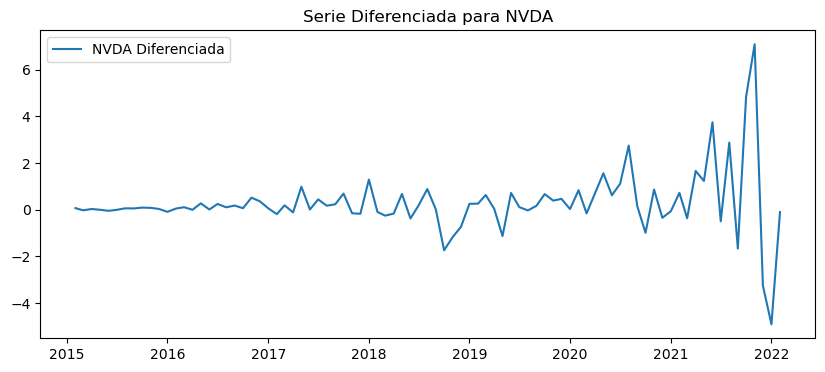

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para NVDA:
{'ADF Statistic': -7.64703626074065, 'ADF p-value': 1.830997869673905e-11, 'KPSS Statistic': 0.31654727056102827, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=297.448, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=299.407, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=300.359, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=299.461, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=300.883, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=299.403, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=298.166, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=297.741, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=299.723, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=300.889, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=300.056, Time=0.35 sec
 ARIM

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


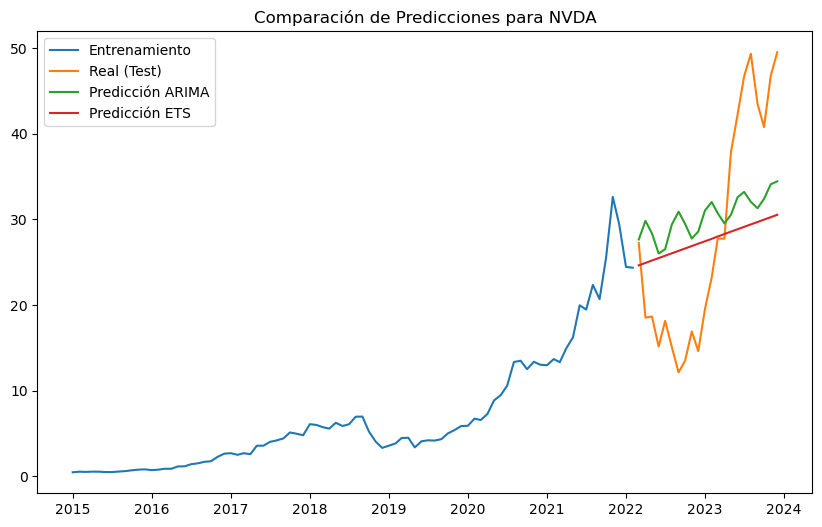

Procesando AAPL...


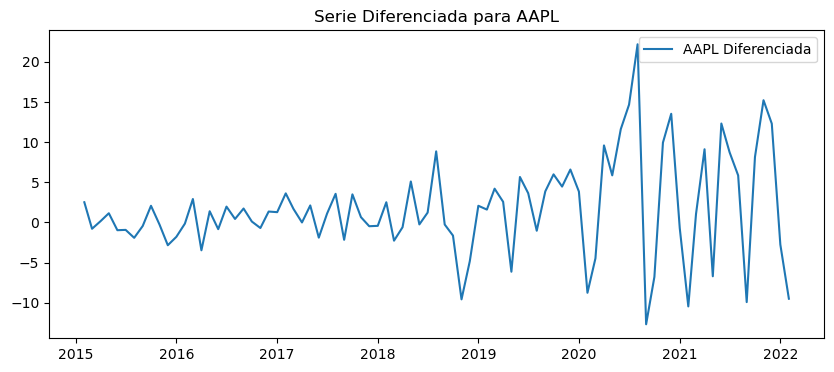

Resultados de estacionariedad para AAPL:
{'ADF Statistic': -7.913700525285653, 'ADF p-value': 3.886645502833835e-12, 'KPSS Statistic': 0.539115654655615, 'KPSS p-value': 0.032856834537023656}
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=585.615, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=583.546, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=583.644, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=569.664, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=555.053, Time=0.19 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=555.938, Time=0.26 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=553.053, Time=0.12 sec
 ARIM

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


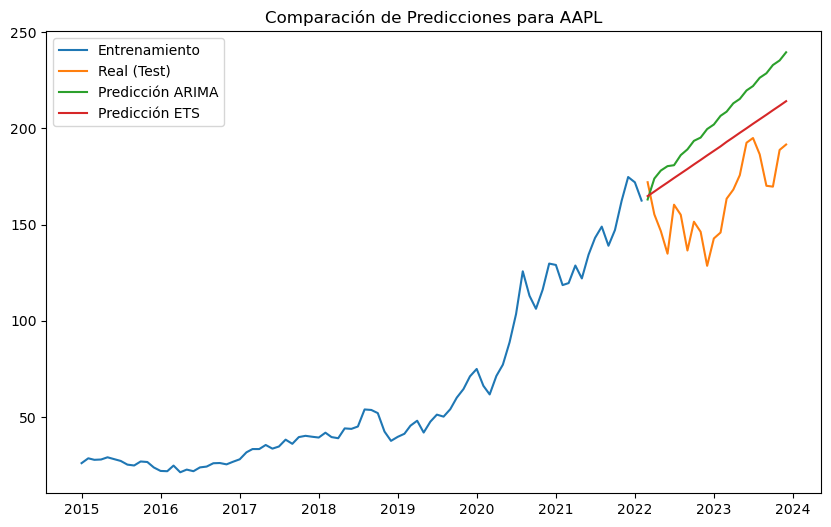

Procesando MSFT...


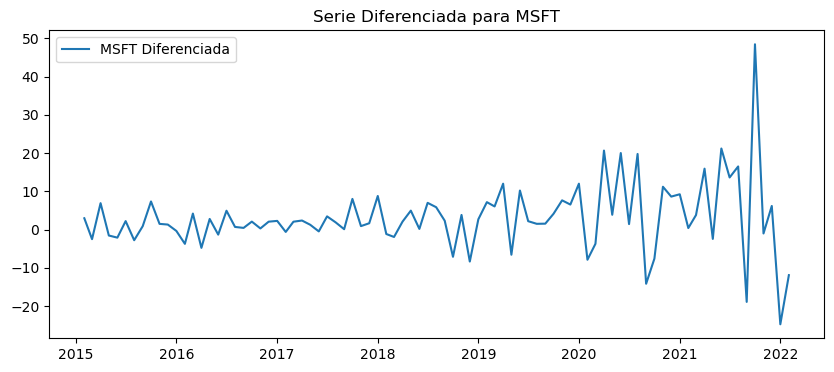

Resultados de estacionariedad para MSFT:
{'ADF Statistic': -10.899241013648789, 'ADF p-value': 1.170675697094023e-19, 'KPSS Statistic': 0.39643061175581656, 'KPSS p-value': 0.07869370182938941}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=618.710, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=621.276, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=619.978, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=620.666, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=628.117, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=620.684, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=620.840, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=620.710, Time=0.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=620.710, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=619.187, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=621.715, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=622.32

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


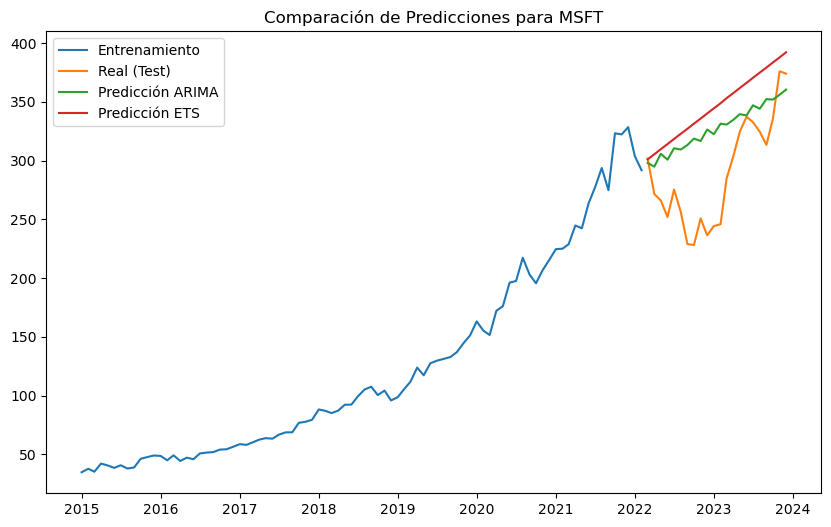

Procesando GOOG...


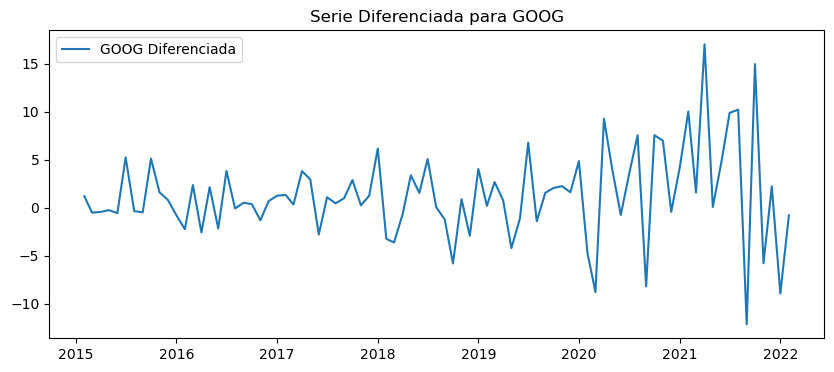

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para GOOG:
{'ADF Statistic': -4.069747045398076, 'ADF p-value': 0.0010862554934348103, 'KPSS Statistic': 0.28911886172450846, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=506.709, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=507.486, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=505.088, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=505.938, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=511.535, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=506.681, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=506.903, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=511.850, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.507 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


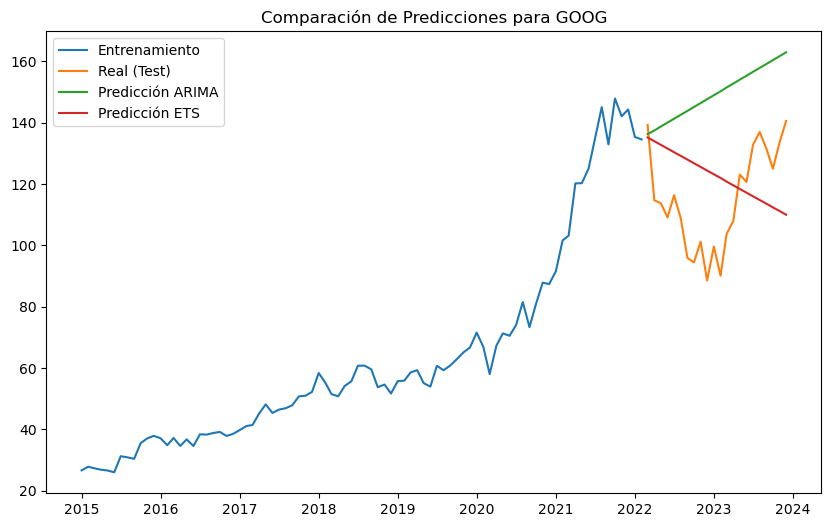

Procesando AMZN...


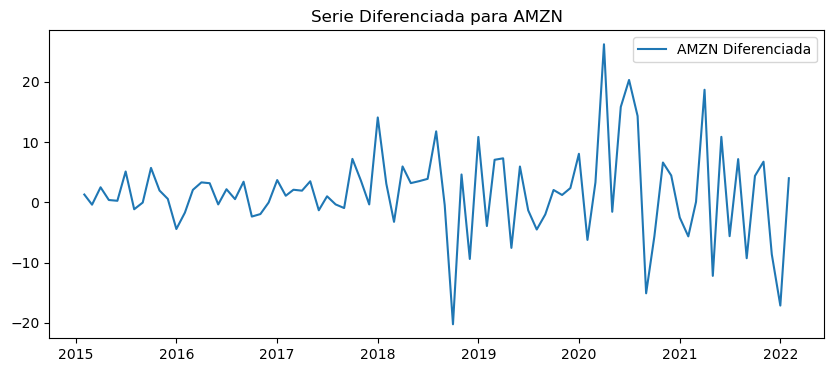

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para AMZN:
{'ADF Statistic': -10.048787577995252, 'ADF p-value': 1.430785502608456e-17, 'KPSS Statistic': 0.0712104653441881, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=584.830, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=584.728, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=585.810, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=585.750, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=586.636, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=587.730, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.970 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


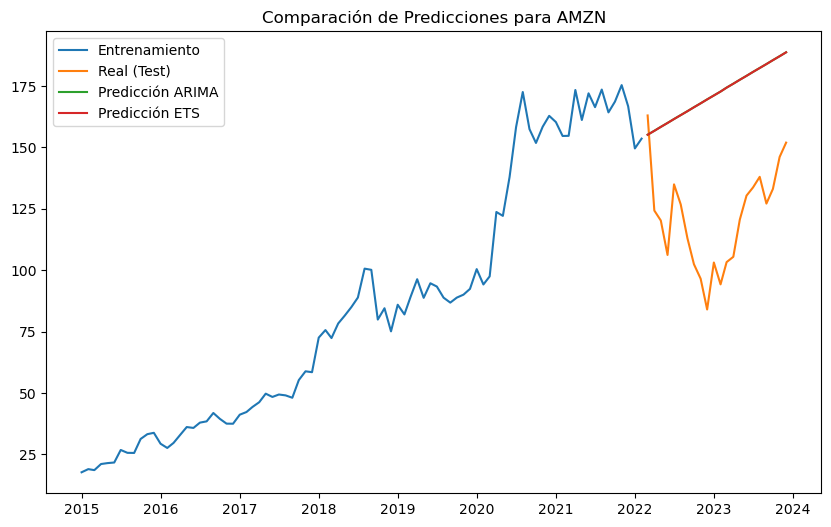

Procesando GOOGL...


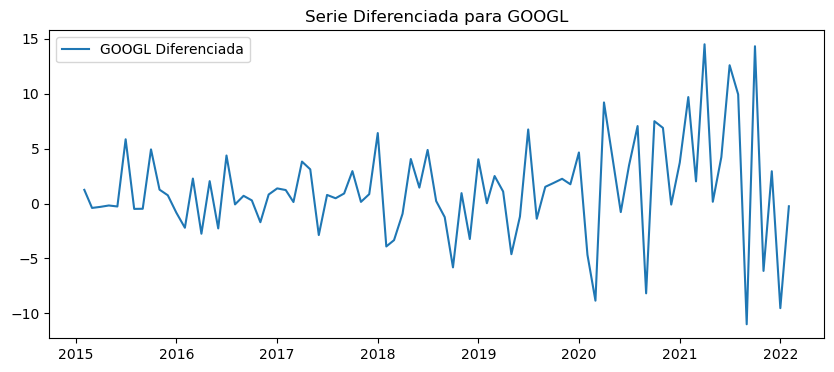

Resultados de estacionariedad para GOOGL:
{'ADF Statistic': -3.8628803592179315, 'ADF p-value': 0.0023256614763118755, 'KPSS Statistic': 0.3689949705337575, 'KPSS p-value': 0.09051940925269072}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=505.642, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=505.226, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=503.668, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=504.199, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=509.425, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=505.517, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=505.606, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=505.397, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=510.232, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.308 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


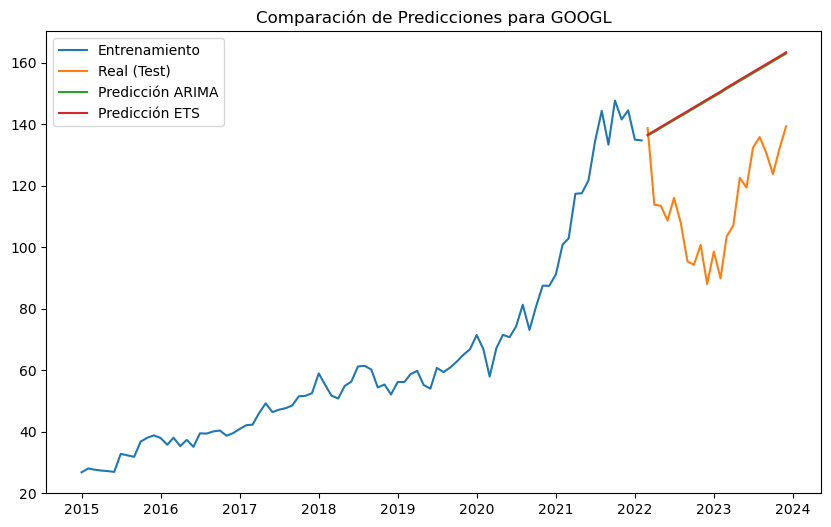

Procesando META...


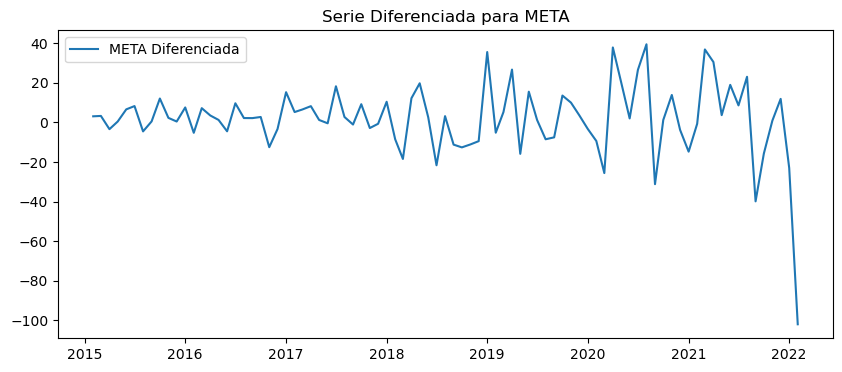

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para META:
{'ADF Statistic': -5.676389419258737, 'ADF p-value': 8.685250083688225e-07, 'KPSS Statistic': 0.12096282387749387, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=740.356, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=740.233, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=741.178, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=740.136, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=738.862, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=739.965, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.117 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


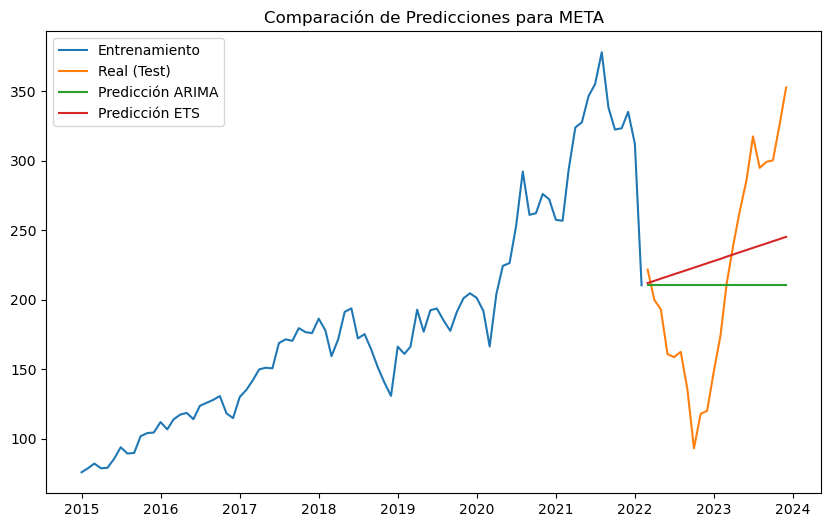

Procesando TSLA...


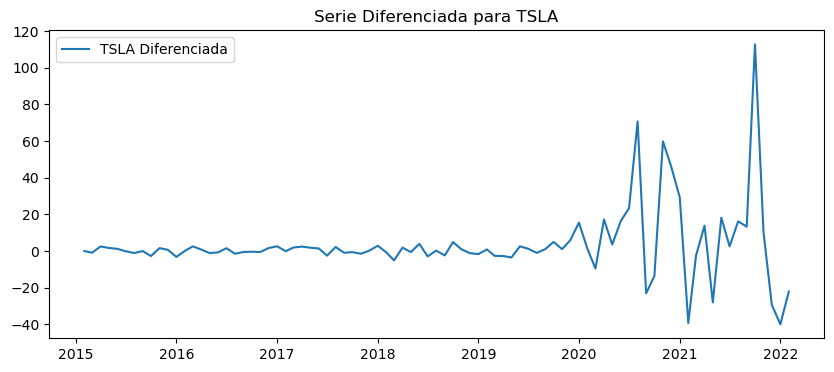

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para TSLA:
{'ADF Statistic': -1.4847276791799726, 'ADF p-value': 0.5410523564131594, 'KPSS Statistic': 0.28686571591138815, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=749.903, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=749.087, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=748.155, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=750.245, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=749.974, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=749.655, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=750.790, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=747.720, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=749.647, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=749.558, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=748.602, Time=0.09 sec
 ARIMA

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


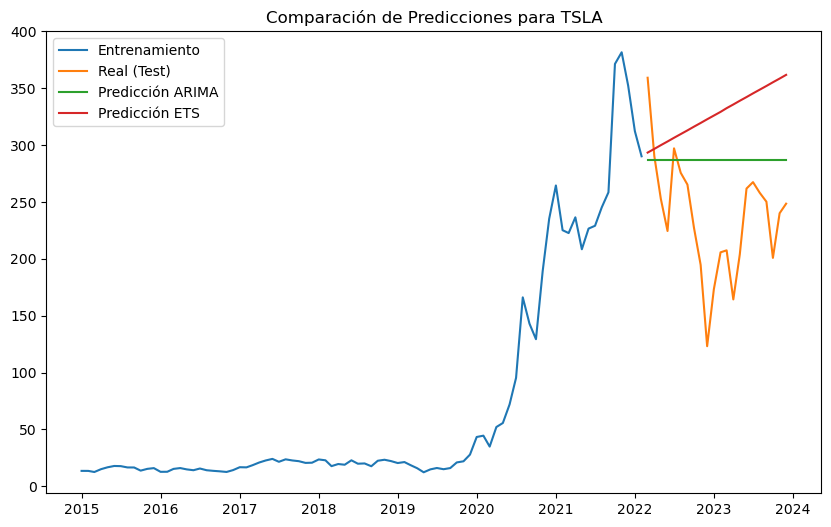

Procesando SAP...


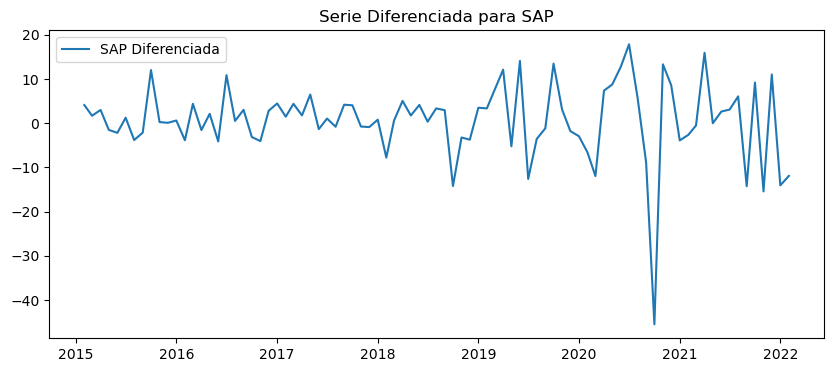

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para SAP:
{'ADF Statistic': -4.8476911232061335, 'ADF p-value': 4.404234034072402e-05, 'KPSS Statistic': 0.08404676756652059, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=610.397, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=612.178, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=612.152, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=608.808, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.479 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


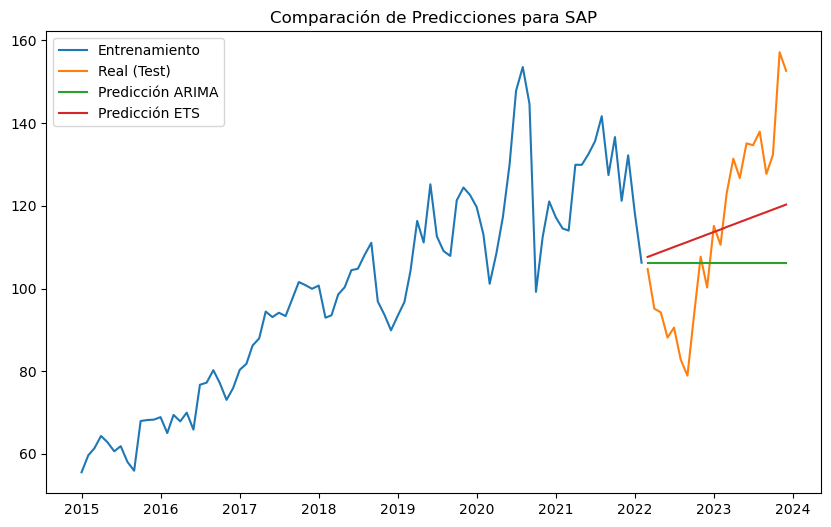

Procesando KO...


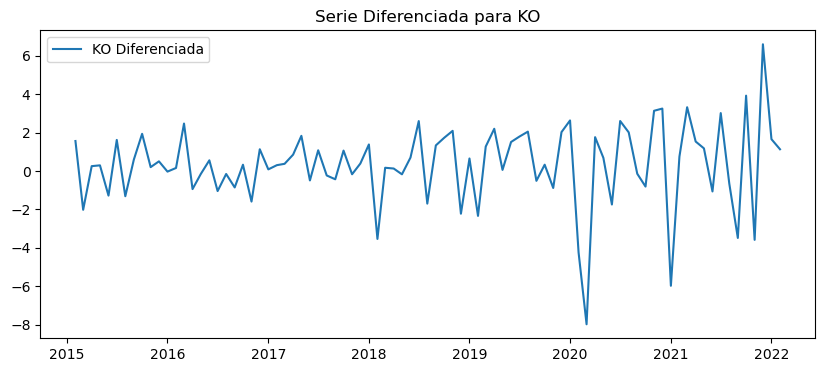

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para KO:
{'ADF Statistic': -8.188483341110118, 'ADF p-value': 7.78263138762358e-13, 'KPSS Statistic': 0.1946728365486332, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=370.481, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=369.957, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=368.859, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=370.439, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=369.122, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=370.965, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=370.013, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.963 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


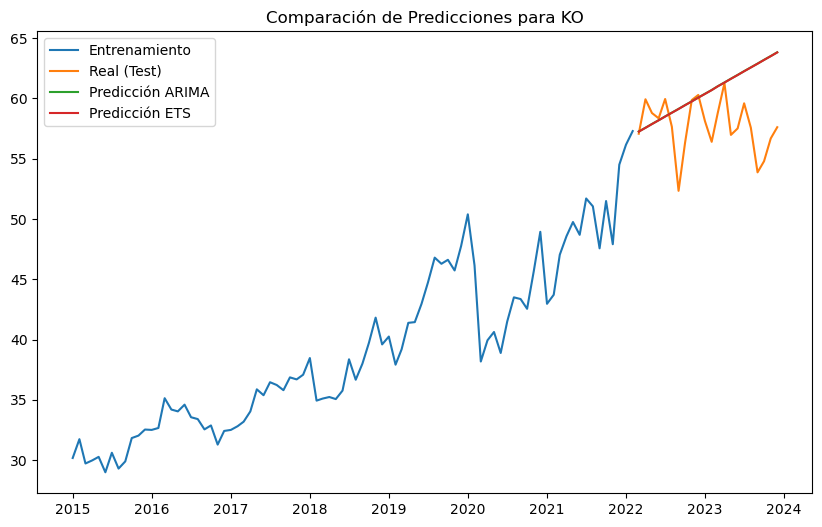

Procesando TSM...


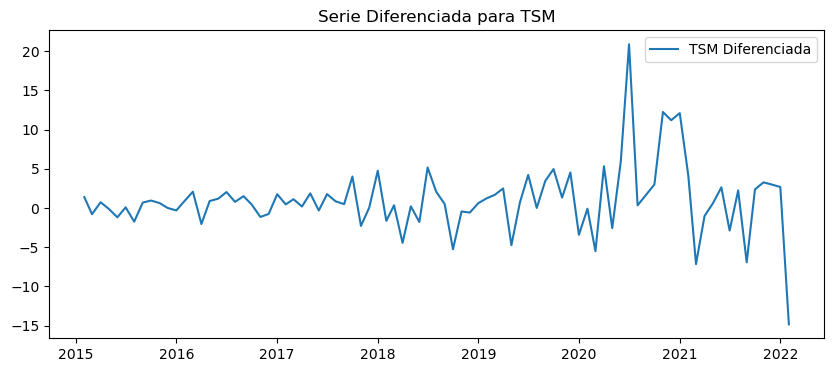

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para TSM:
{'ADF Statistic': -6.804054611845486, 'ADF p-value': 2.1996514625291695e-09, 'KPSS Statistic': 0.20934942855668884, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=490.433, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=493.101, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=492.462, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=492.776, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=495.522, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=495.829, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=496.227, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=492.370, Time=0.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=492.388, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=494.410, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=497.612, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=497.773, Time=0.28 sec


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


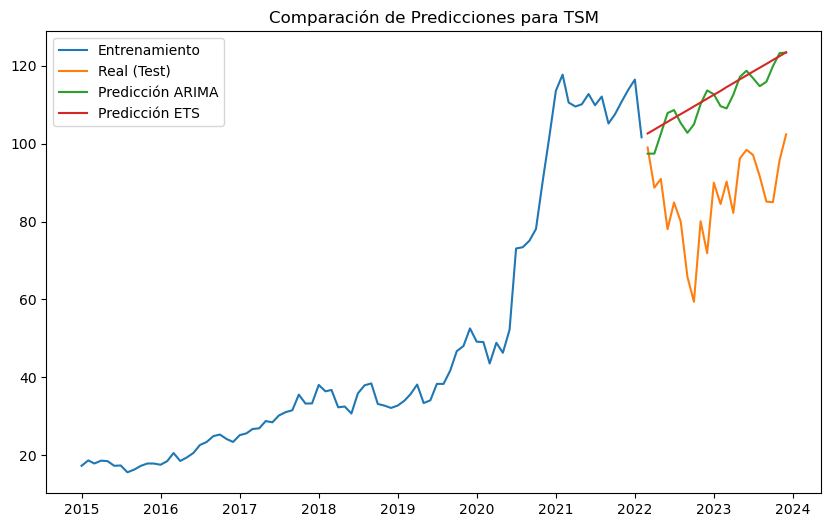

Procesando AVGO...


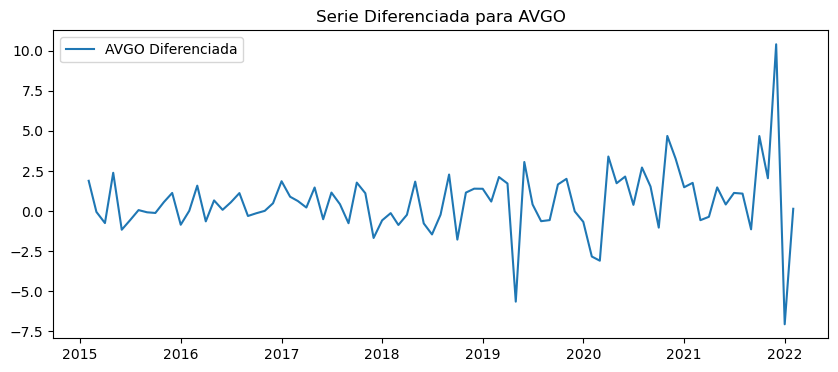

Resultados de estacionariedad para AVGO:
{'ADF Statistic': -10.900080323068762, 'ADF p-value': 1.1652583871228634e-19, 'KPSS Statistic': 0.354255328356635, 'KPSS p-value': 0.09687270329455389}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=373.874, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=368.883, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=368.069, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=367.982, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=372.789, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=369.977, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=369.979, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=371.943, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=374.004, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.470 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


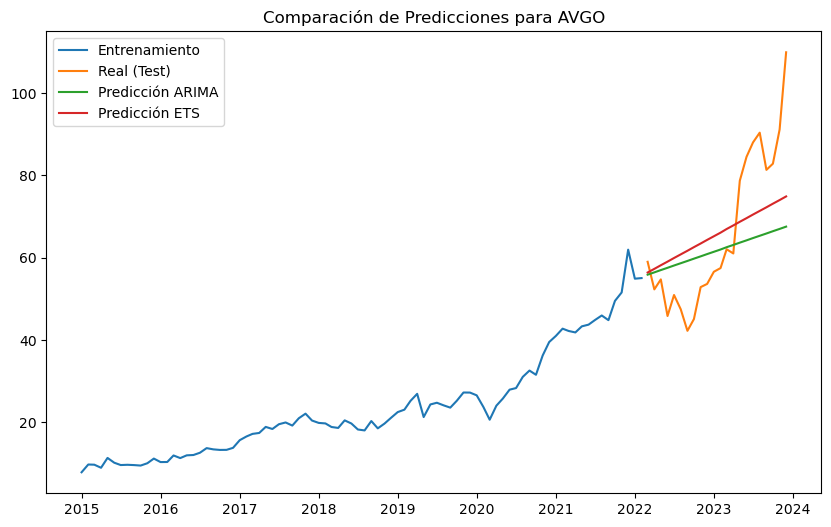

Procesando LLY...


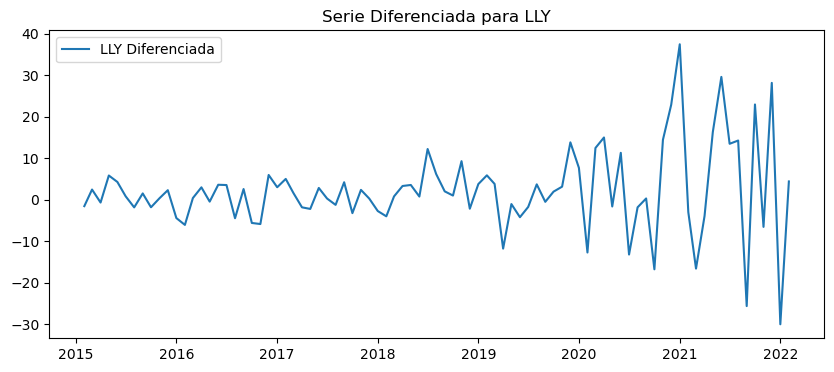

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para LLY:
{'ADF Statistic': -7.826647766085843, 'ADF p-value': 6.455027552315509e-12, 'KPSS Statistic': 0.26435320626214237, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=638.659, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=640.173, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=641.714, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=641.729, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=641.887, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=638.262, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=643.720, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=640.827, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=633.622, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=632.294, Time=0.20 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=633.452, Time=0.32 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=634.218, Time=0.58 sec
 

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


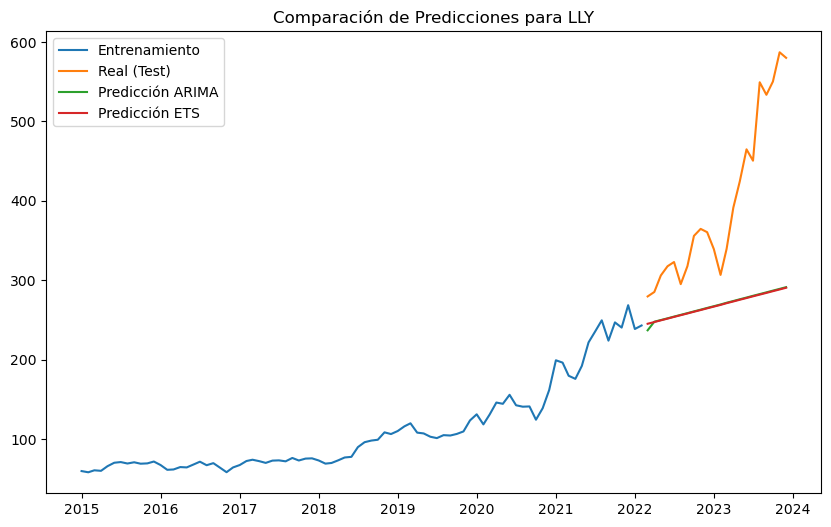

Procesando WMT...


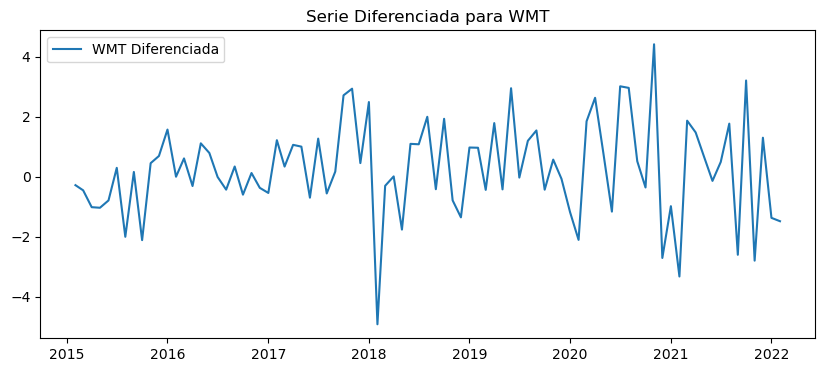

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para WMT:
{'ADF Statistic': -10.455874027642734, 'ADF p-value': 1.3991939385792486e-18, 'KPSS Statistic': 0.16262473337951283, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=326.553, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=324.363, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=324.497, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=324.846, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=324.202, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=325.486, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.263 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


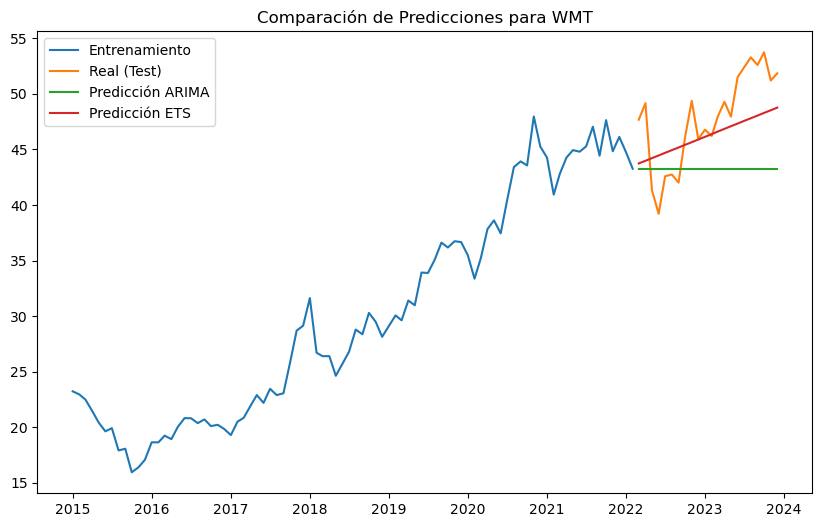

Procesando JPM...


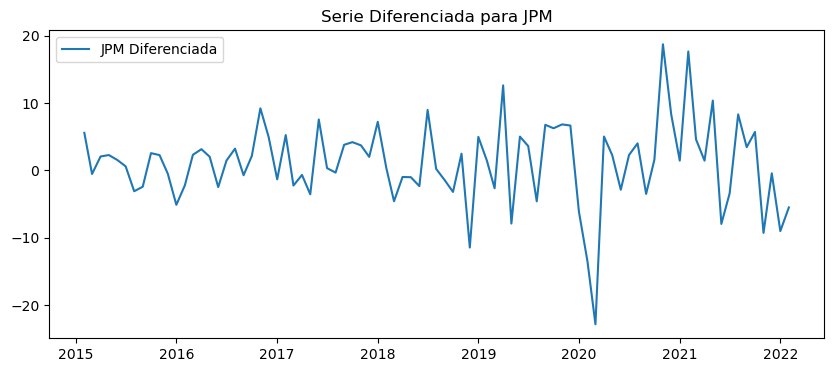

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para JPM:
{'ADF Statistic': -8.071172066470584, 'ADF p-value': 1.548129092761656e-12, 'KPSS Statistic': 0.0440375616047494, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=557.577, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=553.081, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=554.052, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=554.048, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=553.616, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=555.984, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.930 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


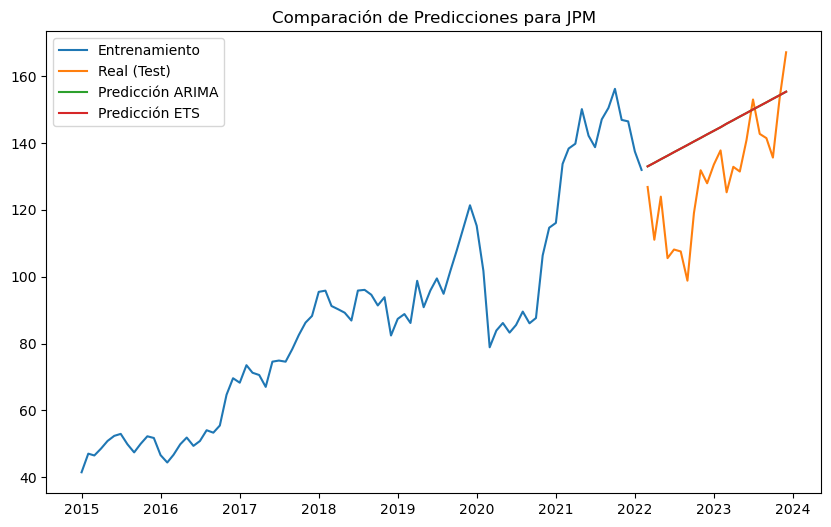

Procesando V...


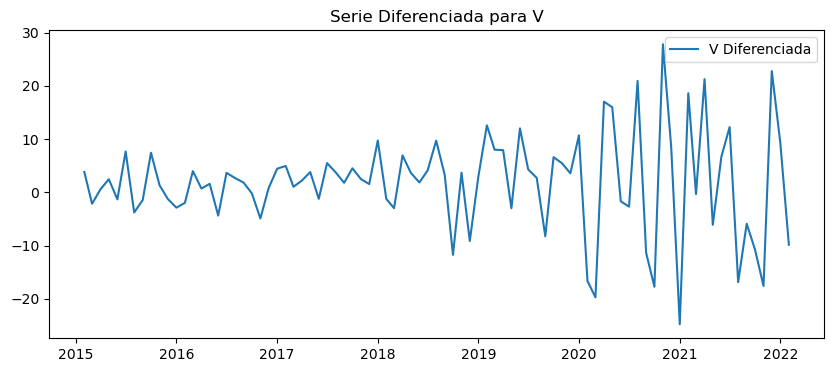

Resultados de estacionariedad para V:
{'ADF Statistic': -10.143292411167968, 'ADF p-value': 8.311269777225613e-18, 'KPSS Statistic': 0.5000000000000026, 'KPSS p-value': 0.041666666666666095}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=615.950, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=625.422, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=624.864, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=620.660, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=626.471, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=613.962, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=613.090, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=614.144, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=617.860, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=615.959, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=622.580, Time=0.13 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Tota

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


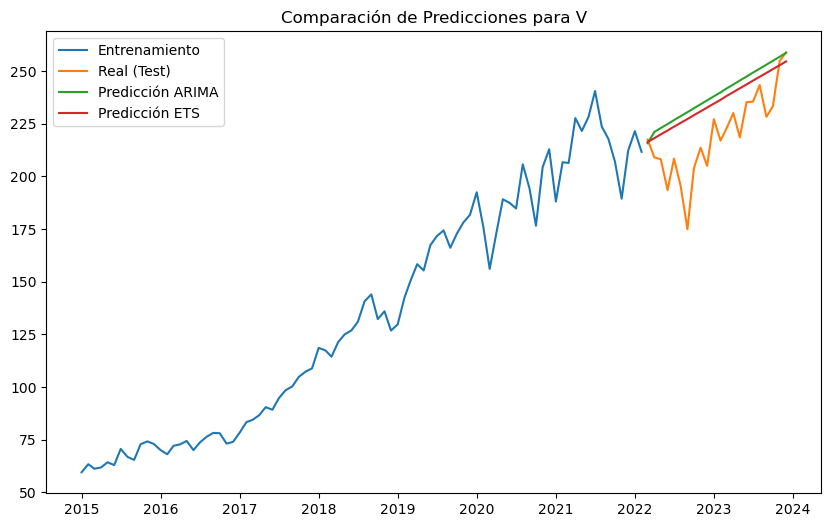

Procesando UNH...


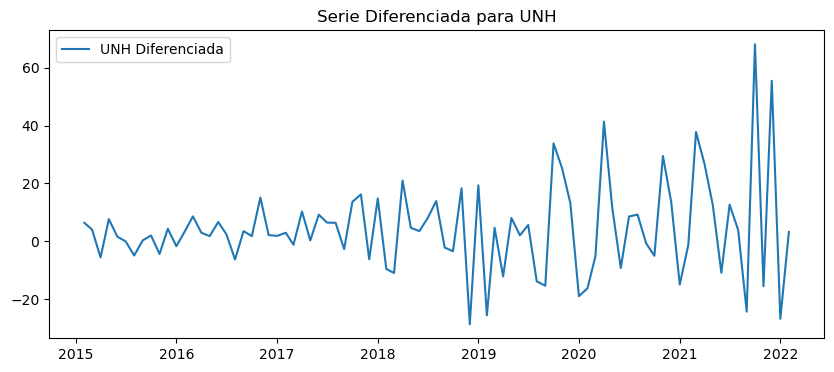

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para UNH:
{'ADF Statistic': -2.140560481161984, 'ADF p-value': 0.22852075341812167, 'KPSS Statistic': 0.3387709347000982, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=714.857, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=716.769, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=711.233, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=710.602, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=720.695, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=713.048, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=712.483, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=714.186, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=719.646, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.580 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


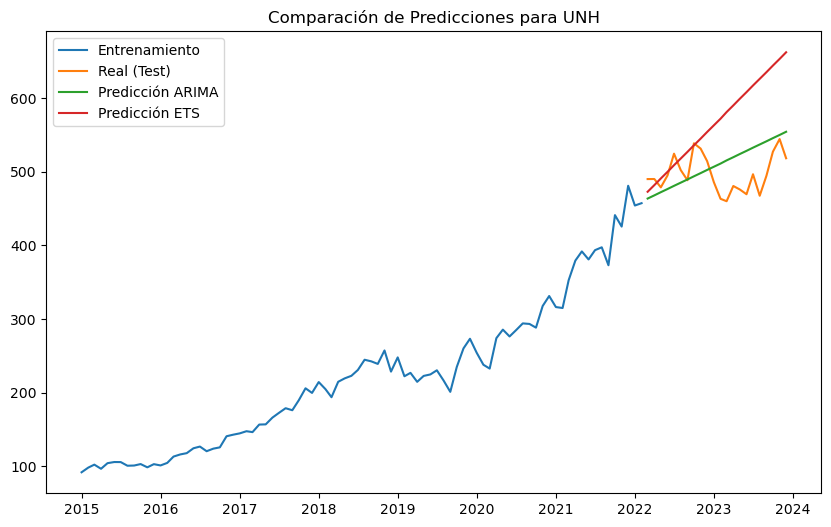

Procesando XOM...


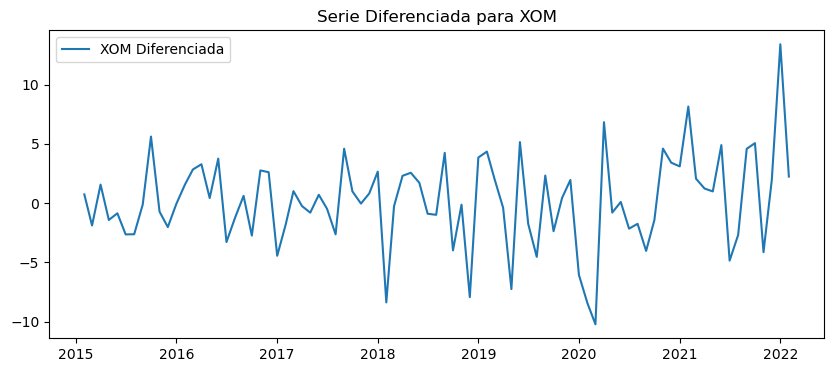

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para XOM:
{'ADF Statistic': -8.5410754759038, 'ADF p-value': 9.779551606725578e-14, 'KPSS Statistic': 0.19478393998597052, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=472.770, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=474.499, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=474.409, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=470.930, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=475.770, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.144 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


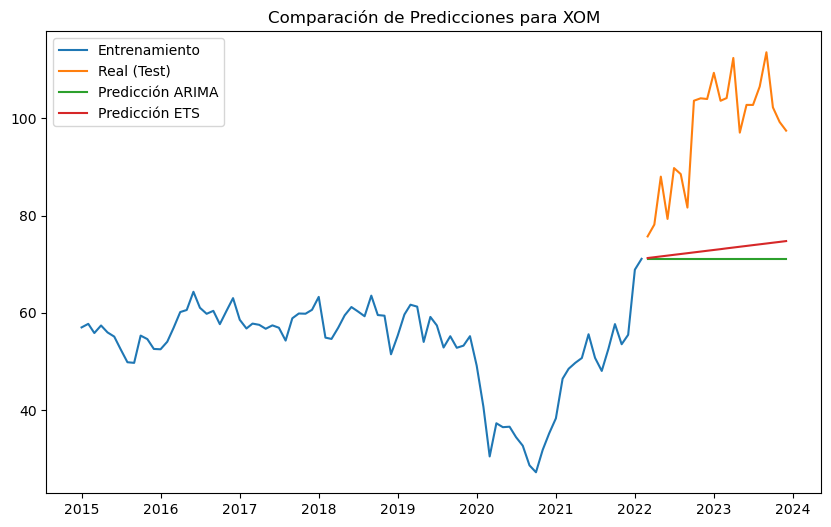

Procesando ORCL...


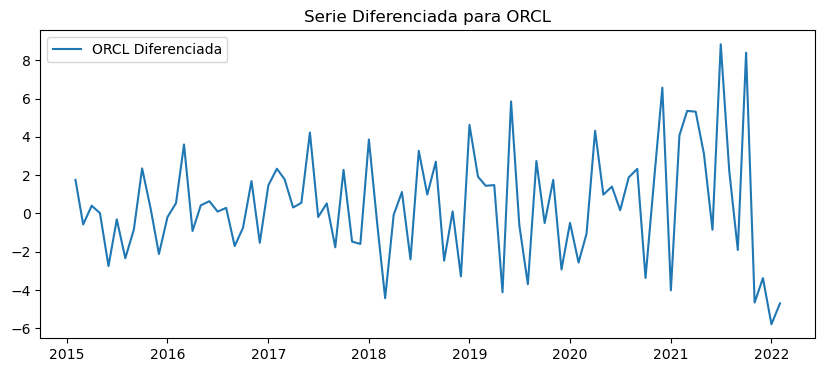

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para ORCL:
{'ADF Statistic': -3.25694878952615, 'ADF p-value': 0.01691601683417264, 'KPSS Statistic': 0.13520530877138356, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=429.441, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=425.679, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=427.369, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=427.394, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=425.592, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=429.361, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.949 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


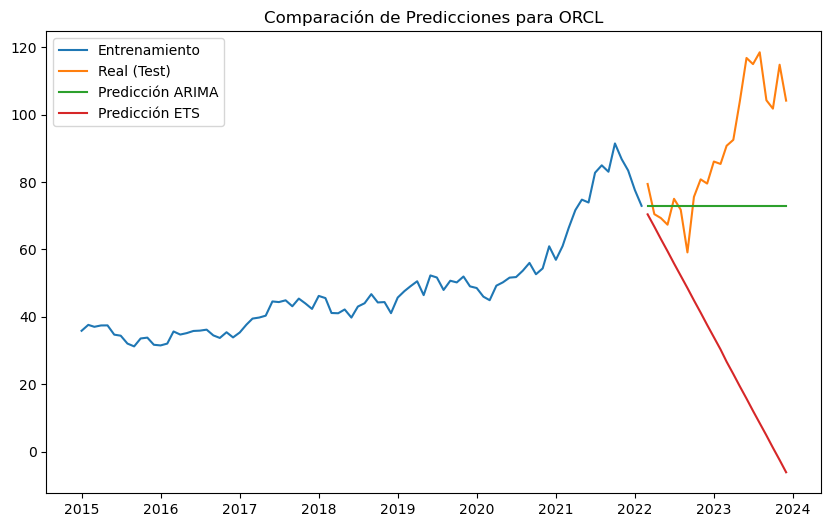

Procesando MA...


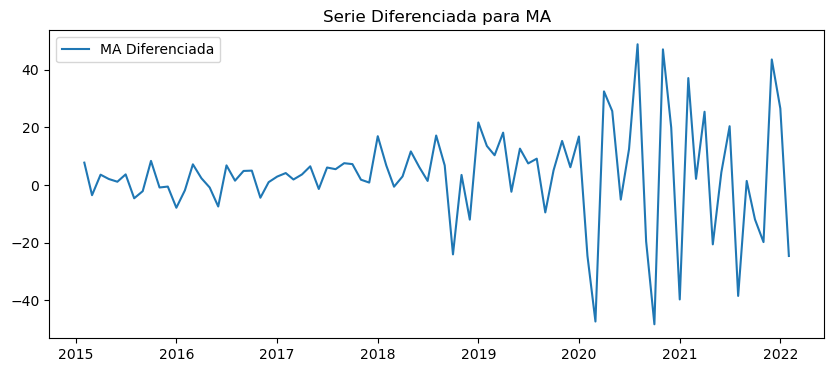

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para MA:
{'ADF Statistic': -5.7365245938428835, 'ADF p-value': 6.419374664597567e-07, 'KPSS Statistic': 0.1693925852879805, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=714.444, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=730.818, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=729.876, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=723.834, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=731.766, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=713.011, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=714.184, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=721.926, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=714.767, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=712.940, Time=0.28 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=714.455, Time=0.40 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=716.459, Time=0.42 sec
 A

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


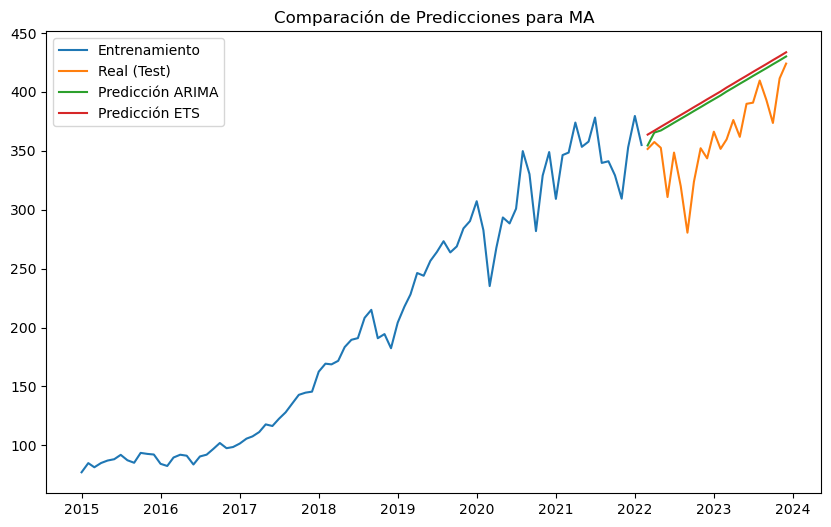

Procesando NVO...


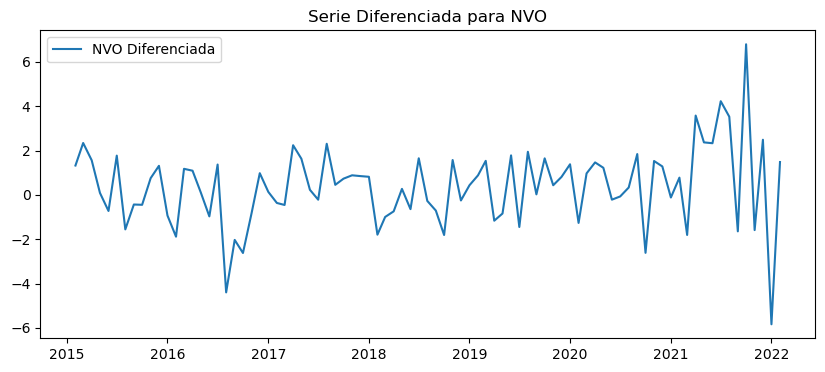

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para NVO:
{'ADF Statistic': -4.7618970767921525, 'ADF p-value': 6.428779960753467e-05, 'KPSS Statistic': 0.33775370069337723, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=342.734, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=344.037, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=345.071, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=345.410, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=345.507, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=342.200, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=341.799, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=343.797, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=342.507, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=343.692, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=342.462, Time=0.09 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


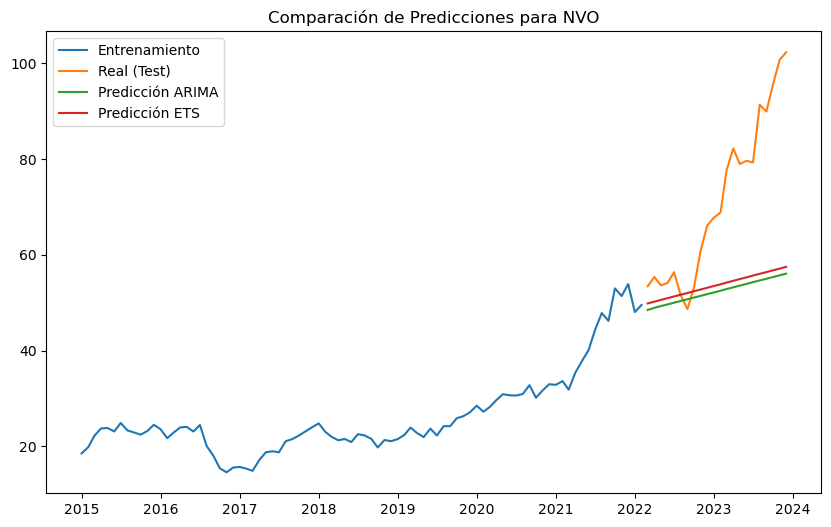

Procesando COST...


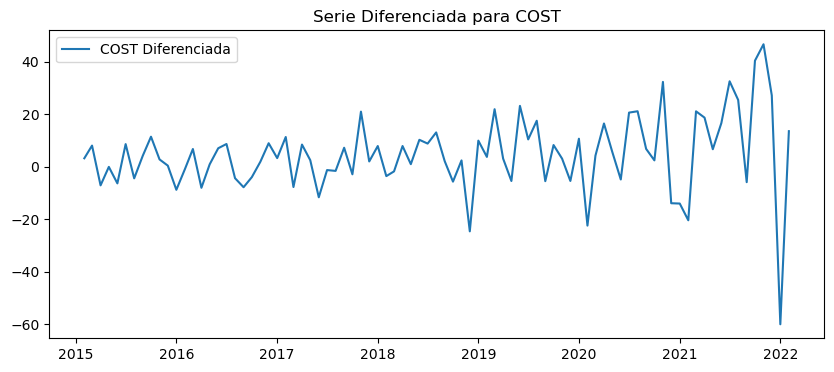

Resultados de estacionariedad para COST:
{'ADF Statistic': -2.9353932553632163, 'ADF p-value': 0.04138434093700499, 'KPSS Statistic': 0.44566618037078487, 'KPSS p-value': 0.05747147397810998}
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=747.479, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=729.653, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=745.483, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=722.815, Time=0.19 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=702.743, Time=0.24 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=704.629, Time=0.29 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=700.750, Time=0.13 sec
 ARIM

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


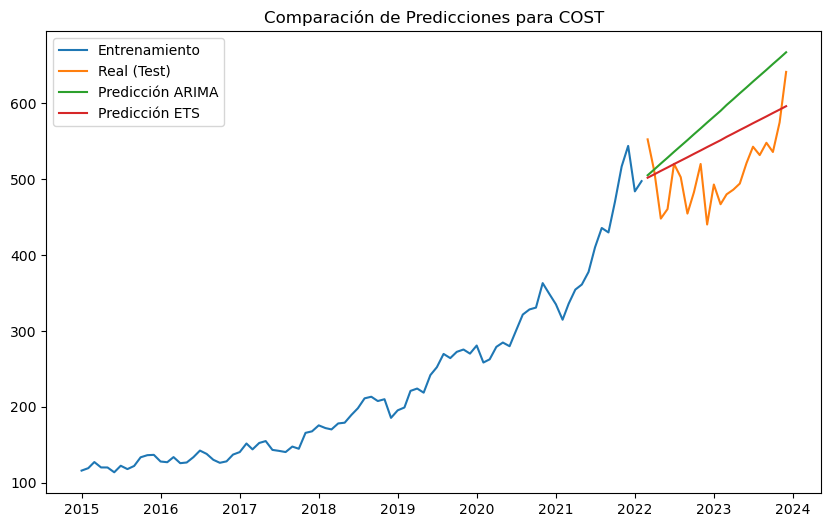

Procesando HD...


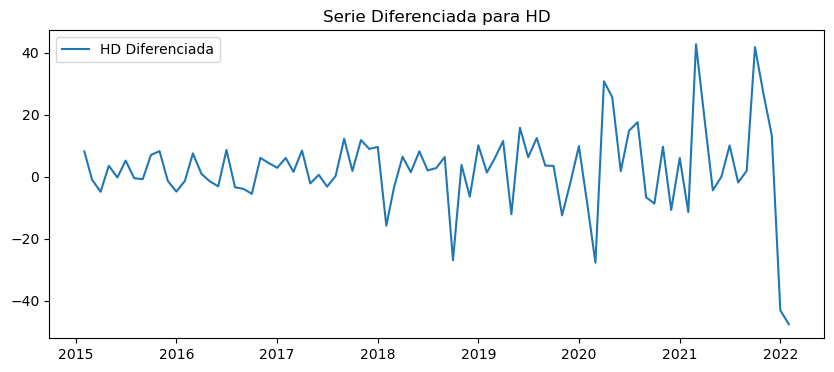

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para HD:
{'ADF Statistic': -3.615126989147544, 'ADF p-value': 0.005478331095723856, 'KPSS Statistic': 0.051121349976232834, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=689.475, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=688.015, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=687.421, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=686.399, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=688.831, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=688.186, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=686.772, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=683.481, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=683.193, Time=0.45 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=681.241, Time=0.30 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=683.199, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=682.864, Time=0.79 sec
 A

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


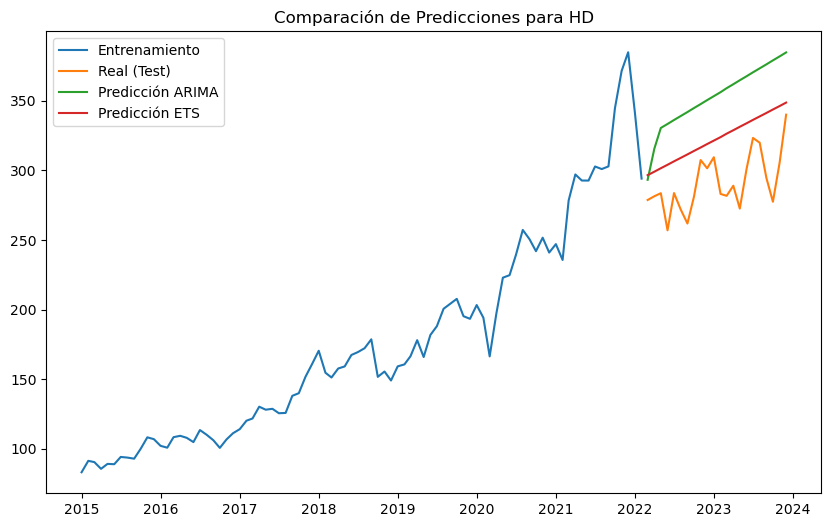

Procesando PG...


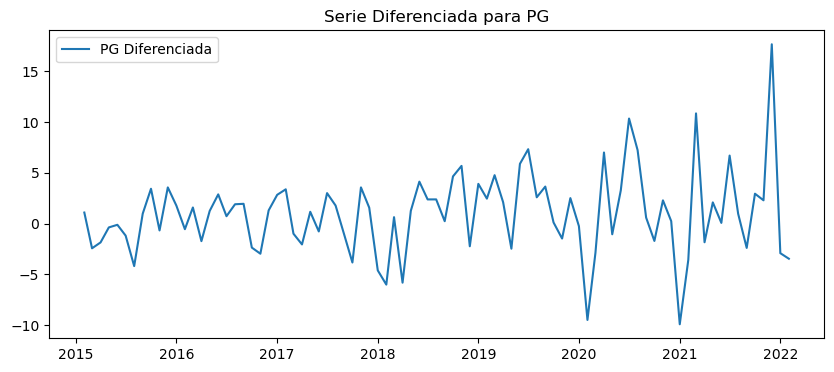

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para PG:
{'ADF Statistic': -7.246273069221408, 'ADF p-value': 1.828785496664751e-10, 'KPSS Statistic': 0.2593502227450457, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=483.104, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=483.336, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=484.615, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=484.169, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=485.997, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=483.731, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=483.803, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=485.077, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=482.294, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=483.017, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=483.548, Time=0.13 sec
 ARIMA(

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


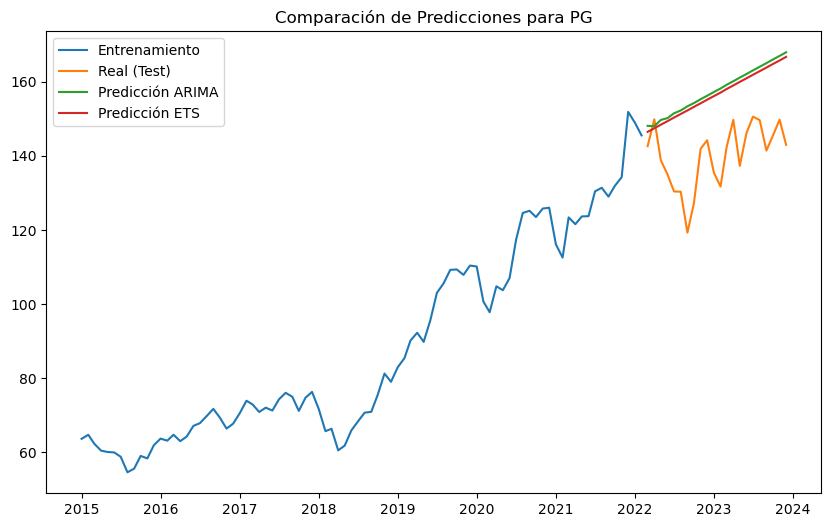

Procesando JNJ...


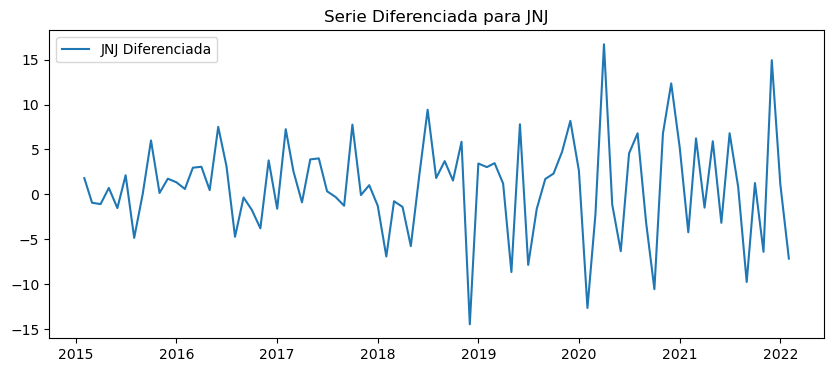

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para JNJ:
{'ADF Statistic': -5.845052668527294, 'ADF p-value': 3.7003299849199126e-07, 'KPSS Statistic': 0.0968322334393424, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=530.131, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=534.177, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=534.662, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=532.226, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=534.386, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=526.716, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=525.328, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=526.893, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=532.241, Time=0.11 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.463 secon

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


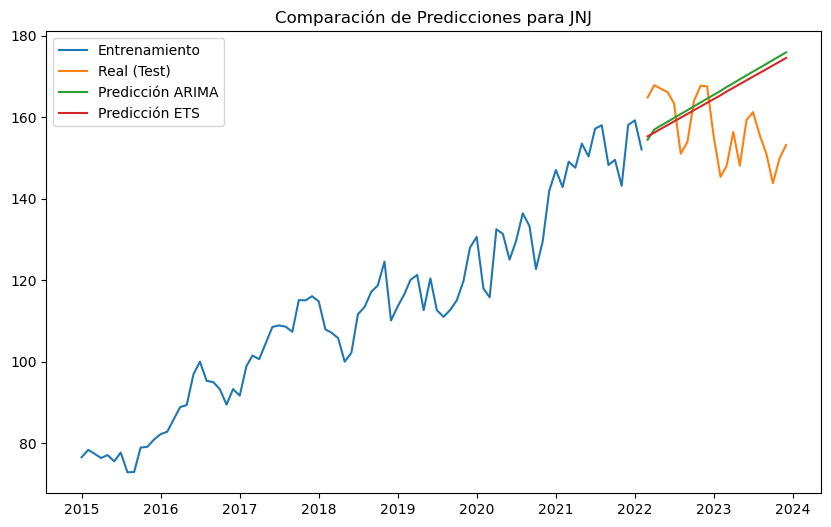

Procesando ABBV...


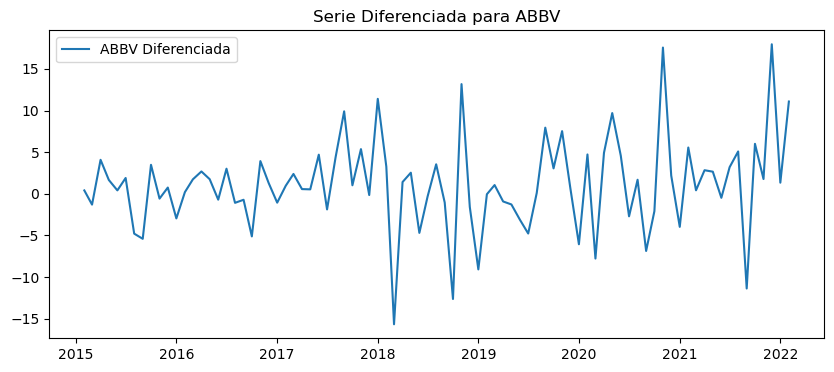

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para ABBV:
{'ADF Statistic': -9.912250677379411, 'ADF p-value': 3.146494241613432e-17, 'KPSS Statistic': 0.3270619573869475, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=540.036, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=536.227, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=537.247, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=536.982, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=537.504, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=538.653, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.371 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


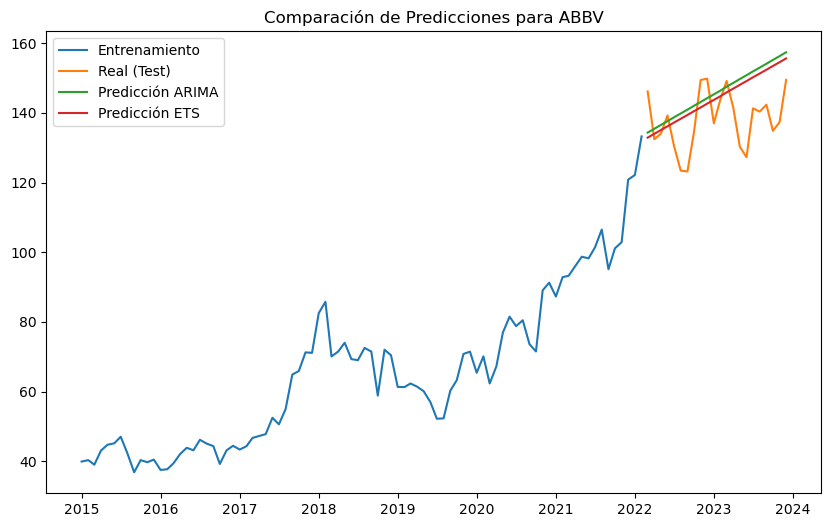

Procesando BAC...


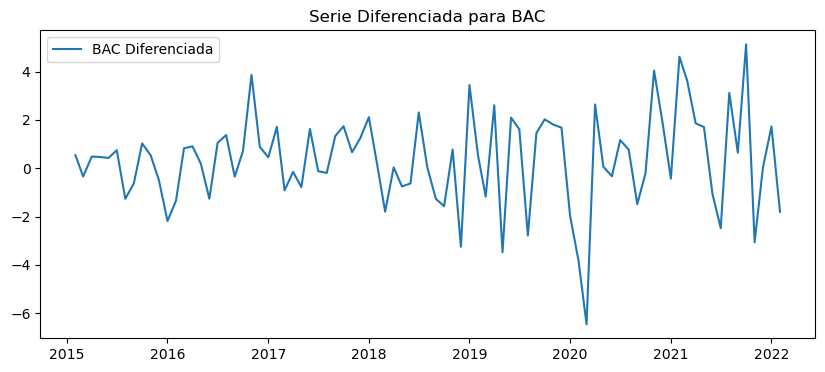

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para BAC:
{'ADF Statistic': -9.031727181740868, 'ADF p-value': 5.422174421300074e-15, 'KPSS Statistic': 0.09396368222498996, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=361.707, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=357.725, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=359.723, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=359.723, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=358.267, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.575 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


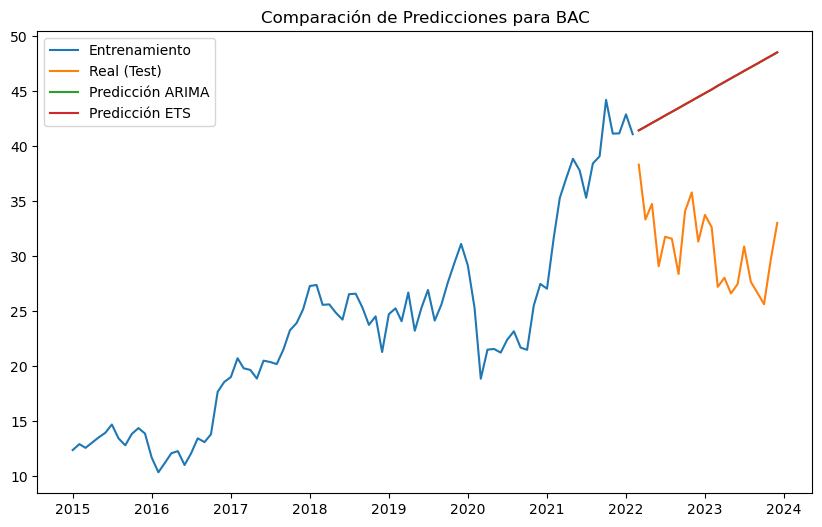

Procesando NFLX...


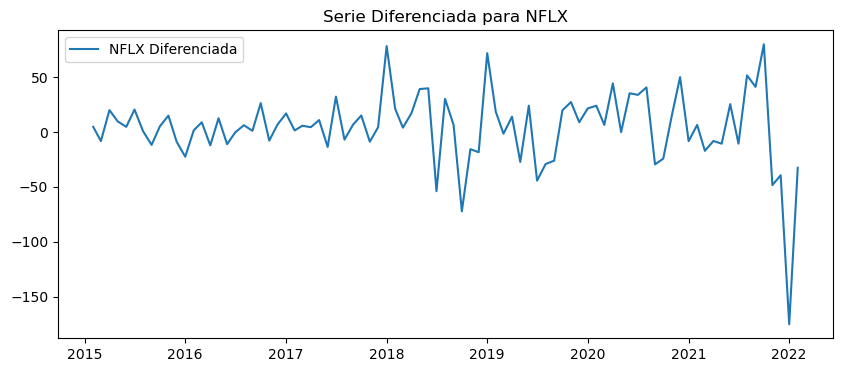

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para NFLX:
{'ADF Statistic': -5.024636846921793, 'ADF p-value': 1.983183560305081e-05, 'KPSS Statistic': 0.09053060716146458, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=839.252, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=841.542, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=840.535, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=841.051, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=840.695, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=839.716, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=839.598, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=841.185, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=842.421, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=838.531, Time=0.36 sec
 ARIMA(3

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


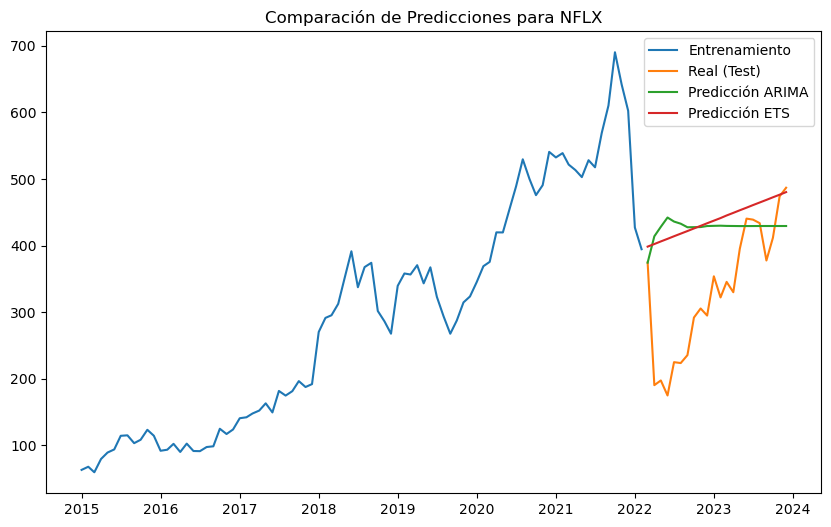

Procesando CRM...


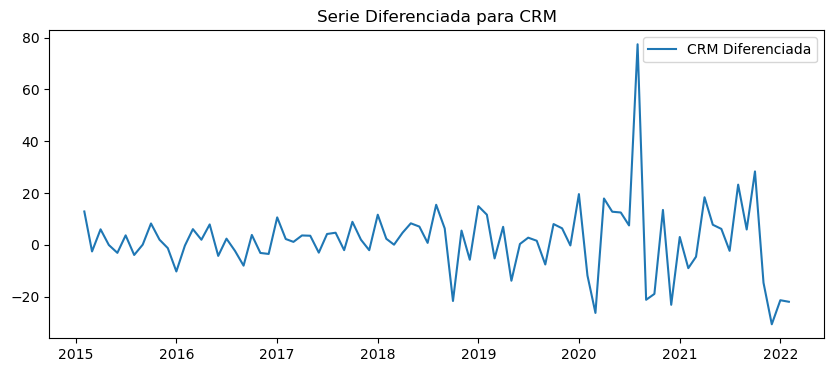

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para CRM:
{'ADF Statistic': -5.197719799439403, 'ADF p-value': 8.88681587755286e-06, 'KPSS Statistic': 0.05281219564796538, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=690.585, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=692.557, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=692.555, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=690.041, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.663 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


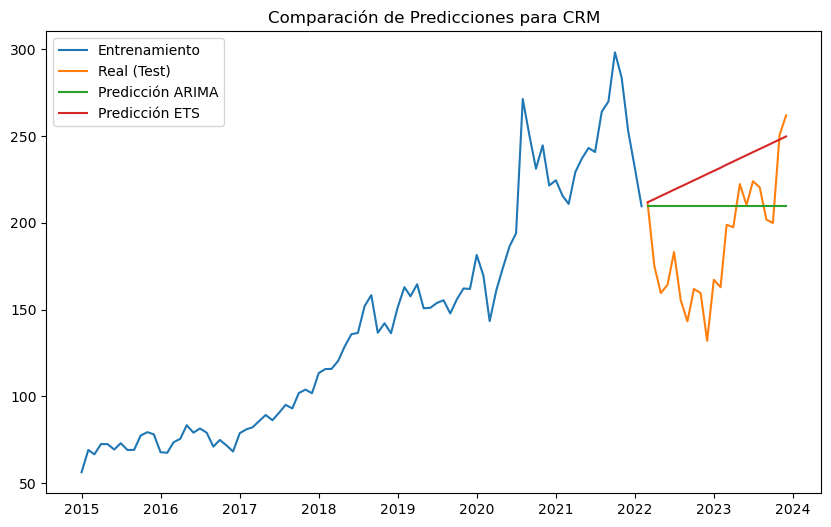

Procesando CVX...


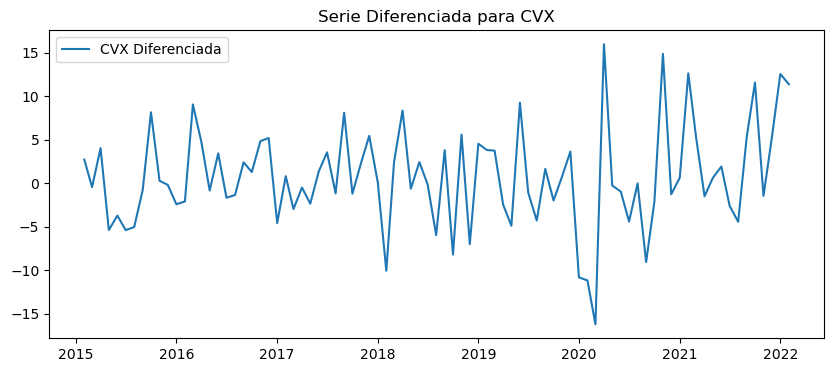

C:\Users\pacol\AppData\Local\Temp\ipykernel_5292\3170360802.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


Resultados de estacionariedad para CVX:
{'ADF Statistic': -8.621898284970705, 'ADF p-value': 6.073344932665599e-14, 'KPSS Statistic': 0.18715327826313977, 'KPSS p-value': 0.1}
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=544.213, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=546.144, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=546.130, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=543.542, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=547.959, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.158 seconds


C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


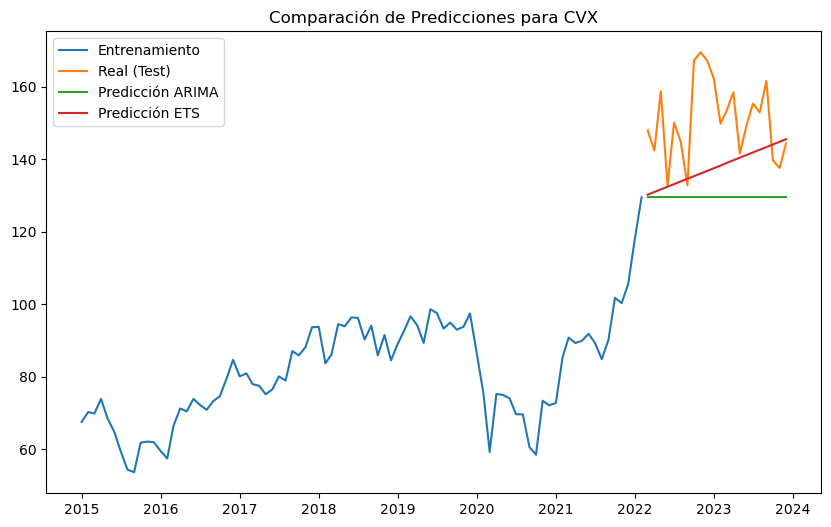

In [8]:
results = []

for stock in df.columns:
    print(f"Procesando {stock}...")
    
    # Diferenciación (retornos)
    diff_series = train_data[stock].diff().dropna()
    
    # Graficar la serie diferenciada
    plt.figure(figsize=(10, 4))
    plt.plot(diff_series, label=f'{stock} Diferenciada')
    plt.title(f'Serie Diferenciada para {stock}')
    plt.legend()
    plt.show()
    
    # Prueba de estacionariedad
    stationarity_results = test_stationarity(diff_series)
    print(f"Resultados de estacionariedad para {stock}:")
    print(stationarity_results)
    
    # Ajustar modelo ARIMA usando auto_arima
    arima_model = auto_arima(
        train_data[stock], 
        seasonal=False, 
        trace=True, 
        error_action='ignore', 
        suppress_warnings=True, 
        stepwise=True
    )
    
    # Predicciones ARIMA
    arima_forecast = arima_model.predict(n_periods=len(test_data))
    
    # Ajustar modelo ETS
    ets_model = ETSModel(train_data[stock], error="add", trend="add", seasonal=None)
    ets_fit = ets_model.fit()
    ets_forecast = ets_fit.forecast(steps=len(test_data))
    
    # Calcular el error MAPE entre los valores reales y las predicciones
    arima_mape = mape(test_data[stock].values, arima_forecast)
    ets_mape = mape(test_data[stock].values, ets_forecast)

    # Almacenar resultados
    results.append({
        'stock': stock,
        'arima_model': arima_model,
        'ets_model': ets_fit,
        'arima_mape': arima_mape,
        'ets_mape': ets_mape
    })
    
    # Visualizar predicciones ARIMA vs ETS
    plt.figure(figsize=(10, 6))
    plt.plot(train_data[stock], label="Entrenamiento")
    plt.plot(test_data[stock], label="Real (Test)")
    plt.plot(test_data.index, arima_forecast, label="Predicción ARIMA")
    plt.plot(test_data.index, ets_forecast, label="Predicción ETS")
    plt.title(f'Comparación de Predicciones para {stock}')
    plt.legend()
    plt.show()

In [9]:
# Convertir los resultados a un DataFrame para análisis
results_df = pd.DataFrame(results)

# Identificar la acción con el mejor y peor ajuste para cada modelo
best_arima_stock = results_df.loc[results_df['arima_mape'].idxmin()]
worst_arima_stock = results_df.loc[results_df['arima_mape'].idxmax()]
best_ets_stock = results_df.loc[results_df['ets_mape'].idxmin()]
worst_ets_stock = results_df.loc[results_df['ets_mape'].idxmax()]

print("Mejor ajuste ARIMA:", best_arima_stock['stock'], "con MAPE:", best_arima_stock['arima_mape'])
print("Peor ajuste ARIMA:", worst_arima_stock['stock'], "con MAPE:", worst_arima_stock['arima_mape'])
print("Mejor ajuste ETS:", best_ets_stock['stock'], "con MAPE:", best_ets_stock['ets_mape'])
print("Peor ajuste ETS:", worst_ets_stock['stock'], "con MAPE:", worst_ets_stock['ets_mape'])

# Comparar ARIMA y ETS para determinar el mejor modelo general
results_df['mejor_modelo'] = results_df.apply(lambda x: 'ARIMA' if x['arima_mape'] < x['ets_mape'] else 'ETS', axis=1)
modelo_counts = results_df['mejor_modelo'].value_counts()
print("Comparación de modelos:", modelo_counts)

Mejor ajuste ARIMA: KO con MAPE: 0.058612958105080756
Peor ajuste ARIMA: NVDA con MAPE: 0.49406952888219047
Mejor ajuste ETS: KO con MAPE: 0.05852353822873908
Peor ajuste ETS: ORCL con MAPE: 0.5787828369099768
Comparación de modelos: mejor_modelo
ETS      18
ARIMA    12
Name: count, dtype: int64
